In [1]:
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.5.0


In [3]:
train_dir = 'D:\Leigthon UNAM\Procesamiento de Imagenes y Videos\observations-master\experiements\data'
train_mask_dir = os.path.join(train_dir, 'con_mascara')
train_no_mask_dir = os.path.join(train_dir, 'sin_mascara')

In [4]:
train_mask_fnames = os.listdir(train_mask_dir)
train_no_mask_fnames = os.listdir(train_no_mask_dir)
print(train_mask_fnames[:10])
print(train_no_mask_fnames[:10])

['0-with-mask.jpg', '1-with-mask.jpg', '10-with-mask.jpg', '100-with-mask.jpg', '101-with-mask.jpg', '103-with-mask.jpg', '104-with-mask.jpg', '105-with-mask.jpg', '106-with-mask.jpg', '107-with-mask.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


In [5]:
print('Total de imagenes con mascarilla: ', len(os.listdir(train_mask_dir)))
print('Total de imagenes sin mascarilla: ', len(os.listdir(train_no_mask_dir)))

Total de imagenes con mascarilla:  690
Total de imagenes sin mascarilla:  686


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    #Clasificacion binaria
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001),
             loss='binary_crossentropy',
             metrics= ['accuracy'])

C:\Users\royer\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height = 150
img_width = 150
batch_size = 10
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip= True,
                                  validation_split=0.2) #set validation split

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') #set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir, #same directory as training data
    target_size= (img_height, img_width),
    batch_size= batch_size,
    class_mode='binary',
    subset= 'validation') #set as training data





Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [9]:
nb_epochs = 10
history = model.fit_generator(
    train_generator,
steps_per_epoch = train_generator.samples // batch_size,
validation_data = validation_generator,
validation_steps = validation_generator.samples // batch_size,
epochs = nb_epochs)

C:\Users\royer\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
110/110 [==============================] - 37s 322ms/step - loss: 0.2690 - accuracy: 0.8854 - val_loss: 0.0874 - val_accuracy: 0.9704
Epoch 2/10
110/110 [==============================] - 37s 333ms/step - loss: 0.1248 - accuracy: 0.9578 - val_loss: 0.0705 - val_accuracy: 0.9778
Epoch 3/10
110/110 [==============================] - 32s 292ms/step - loss: 0.0631 - accuracy: 0.9817 - val_loss: 0.0493 - val_accuracy: 0.9778
Epoch 4/10
110/110 [==============================] - 31s 281ms/step - loss: 0.0555 - accuracy: 0.9789 - val_loss: 0.0444 - val_accuracy: 0.9815
Epoch 5/10
110/110 [==============================] - 31s 280ms/step - loss: 0.0876 - accuracy: 0.9762 - val_loss: 0.0449 - val_accuracy: 0.9815
Epoch 6/10
110/110 [==============================] - 31s 281ms/step - loss: 0.0414 - accuracy: 0.9863 - val_loss: 0.0361 - val_accuracy: 0.9815
Epoch 7/10
110/110 [==============================] - 31s 280ms/step - loss: 0.0341 - accuracy: 0.9881 - val_loss: 0.0284 - val_ac

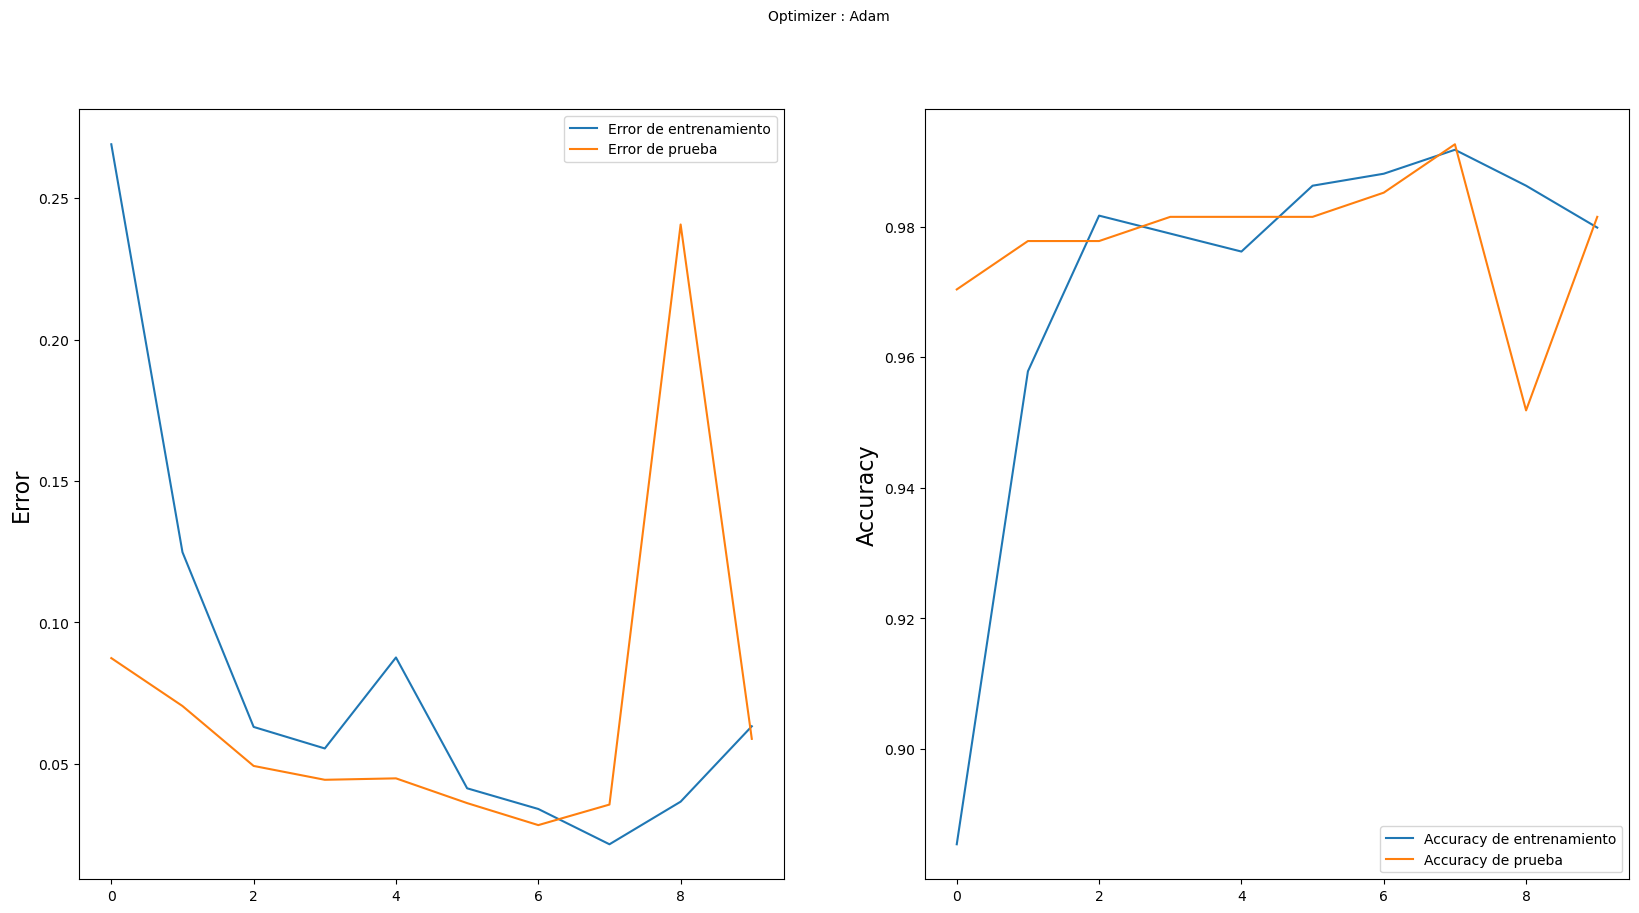

In [11]:
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Error', fontsize=16)
plt.plot(history.history['loss'], label='Error de entrenamiento')
plt.plot(history.history['val_loss'], label='Error de prueba')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Accuracy de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy de prueba')
plt.legend(loc='lower right')
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model

predictions = model.predict_generator(generator=validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_real = validation_generator.classes

C:\Users\royer\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


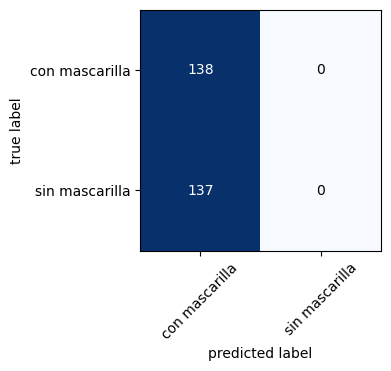

In [13]:
names = ['con mascarilla','sin mascarilla']
matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(4,4), class_names = names, show_normed=False)
plt.tight_layout()

In [14]:
print(metrics.classification_report(y_real,y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.5018    1.0000    0.6683       138
           1     0.0000    0.0000    0.0000       137

    accuracy                         0.5018       275
   macro avg     0.2509    0.5000    0.3341       275
weighted avg     0.2518    0.5018    0.3354       275



C:\Users\royer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from tensorflow.keras.preprocessing import image
from PIL import Image
#import serial

No Lleva mascara


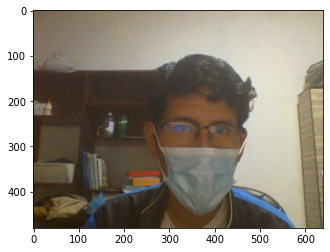

Si lleva mascara


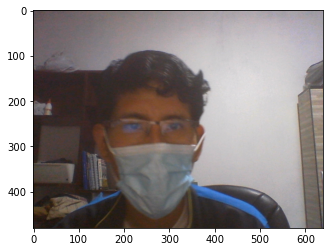

Si lleva mascara


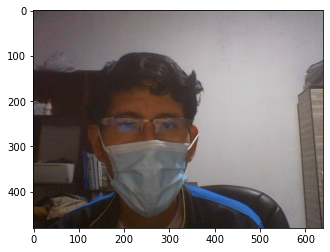

No Lleva mascara


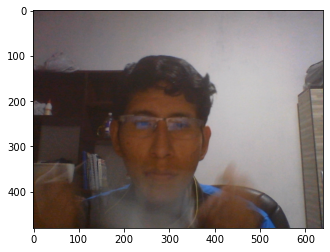

No Lleva mascara


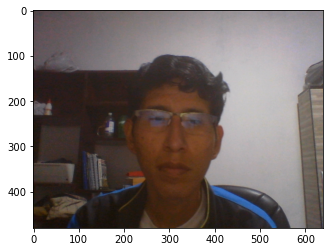

No Lleva mascara


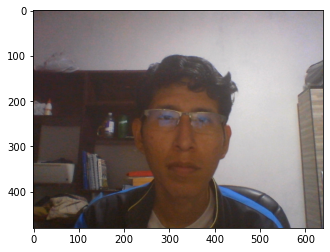

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [16]:
#se = serial.Serial('COM5',9600)

vc = cv2.VideoCapture(1) 
plt.ion()
if vc.isOpened(): 
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

while is_capturing:
    try:    
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    
        frame_res = cv2.resize(frame, dsize=(150, 150), interpolation=cv2.INTER_CUBIC) 
        x=image.img_to_array(frame_res)
        x=np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        if classes[0]>0:
            print("No Lleva mascara")
            #se.write(str('a').encode())
        else:
            print("Si lleva mascara")
            #se.write(str('b').encode())
        webcam_preview = plt.imshow(frame)
        try:    
            plt.pause(1)
        except Exception:
            pass
    except KeyboardInterrupt:
        vc.release()

In [ ]:
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = converter.convert()

In [23]:
#open("mask_detect.model","wb").write(tflite_model)

model.save("model12.h5")